# Renomear Imagens

In [ ]:
import os
path = r'.\mascs'
imgs = [img for img in os.listdir(path) if img.endswith('png')]
for i,img in enumerate(imgs):
    old_img = os.path.join(path,img)
    new_img = os.path.join(path,f'{i+1}_image.png')
    os.rename(old_img,new_img)   

# Criando predicao apartir do json

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
def getSize(image):
    return (600,600)
def createPredict(Obj,old_img,new_img):
    image_name = Obj['filename']
    out_path = new_img
    image_size = getSize(old_img)
    regions = Obj['regions']
    width, height = image_size
    
    # Identificar os tipos únicos e mapear para cores distintas
    unique_types = list(set(region["region_attributes"]["type"] for region in regions))
    type_to_color = {t: int(255 * (i + 1) / len(unique_types)) for i, t in enumerate(unique_types)}
    
    # Criar uma única máscara para todos os tipos
    mask = np.zeros((height, width), dtype=np.uint8)
    
    for region in regions:
        shape = region["shape_attributes"]
        all_points_x = shape["all_points_x"]
        all_points_y = shape["all_points_y"]
        pts = np.array([list(zip(all_points_x, all_points_y))], dtype=np.int32)
        
        region_type = region["region_attributes"]["type"]
        color = type_to_color[region_type]
        
        # Preencher o polígono na máscara com a cor correspondente ao tipo
        cv2.fillPoly(mask, pts, color)
    
    # Salvar a máscara
    out_image_path = os.path.join(out_path, f"mask_{os.path.basename(image_name)}")
    # cv2.imwrite(out_image_path, cv2.resize(mask, (width*2, height*2)))
    print(mask.shape)
    plt.figure(figsize=(10, 10))  # Ajusta o tamanho da figura
    plt.imshow(mask)  # Mostra a imagem
    plt.axis('off')  # Remove os eixos
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove margens
    plt.show()
    return mask

Nome imagen: 221_image.png
Nome no json 221_image.png963740
./221_image.png
./221_pred.png
------------------
(600, 600)


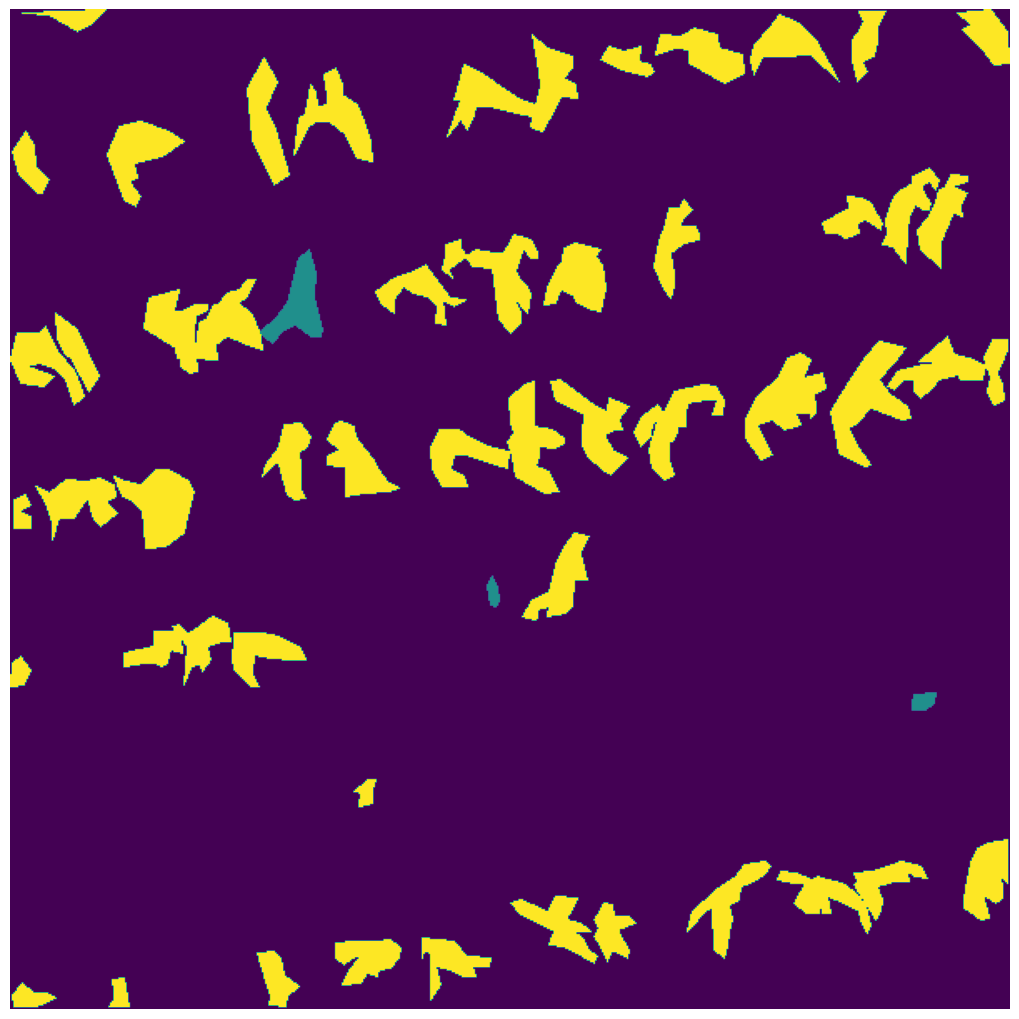

In [2]:
import os
import json
path = './'
imgs = [img for img in os.listdir(path) if img.endswith('png')]
json_name = [json_names for json_names in os.listdir(path) if json_names.endswith('json')][0]
json_path = os.path.join(path,json_name)
with open(json_path,'r') as jsonRegions:
    regions = json.load(jsonRegions)
mascaras = list()
for i,img in enumerate(imgs):
    for imagen,Obj in regions.items():
        old_img = os.path.join(path,img)
        new_img = old_img.replace('image','pred')
        if img == imagen[:len(img)]:
            print('Nome imagen:',img)
            print('Nome no json',imagen)
            print(old_img)
            print(new_img)
            print('------------------')
            mascaras.append({img:createPredict(Obj,old_img,new_img)})
